In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [78]:
image = cv2.imread('sar_2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

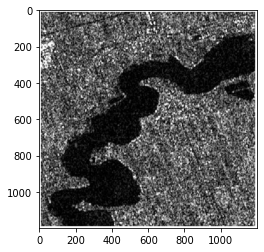

In [5]:
plt.imshow(image_gray, cmap="gray")

# Точечная бинаризация

In [52]:
import copy

bin_img = copy.deepcopy(image_gray)
T  = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

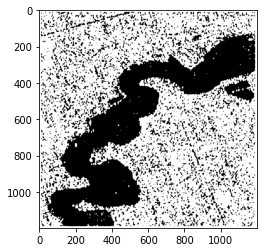

In [53]:
plt.imshow(bin_img, cmap="gray")

# Бинаризация Отсу

In [7]:
# otsu binarization
_,th2 = cv2.threshold(image_gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

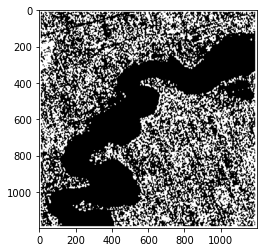

In [8]:
plt.imshow(th2, cmap="gray")

# Адаптивная бинаризация

In [42]:
# 
th3 = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,71,21)


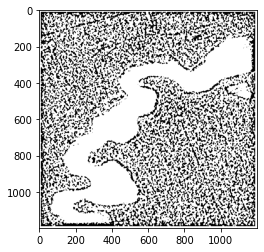

In [43]:
plt.imshow(th3, cmap="gray")

# Оператор Собеля

In [55]:
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

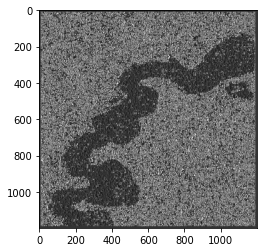

In [57]:
plt.imshow((grad_x - grad_x.min())*255, cmap="gray")

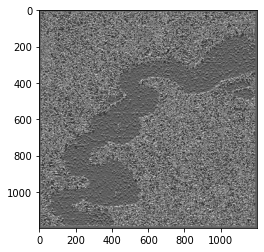

In [58]:
plt.imshow((grad_y - grad_y.min())*255, cmap="gray")

In [60]:
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5,0.0) # mean value between

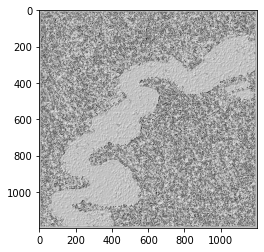

In [62]:
plt.imshow((grad - grad.min())*255, cmap="gray")

# Canny

In [64]:
edges = cv2.Canny(image_gray,100,200)

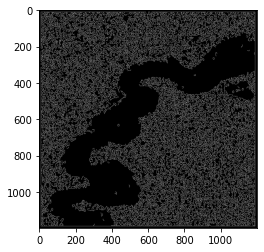

In [65]:
plt.imshow(edges, cmap="gray")

# Преобразование Хафа

In [127]:
image = cv2.imread('img_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

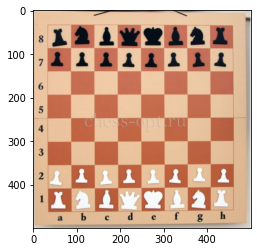

In [128]:
plt.imshow(image)

In [138]:
canny = cv2.Canny(image_gray,50,150,apertureSize = 3)

In [146]:
lines = cv2.HoughLines(canny, 1, np.pi / 180, 190)

In [147]:
import math 

if lines is not None:
        for i in range(0, len(lines)):
            rho = lines[i][0][0]
            theta = lines[i][0][1]
            a = math.cos(theta)
            b = math.sin(theta)
            x0 = a * rho
            y0 = b * rho
            pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
            pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
            cv2.line(image, pt1, pt2, (0,0,255), 3, cv2.LINE_AA)

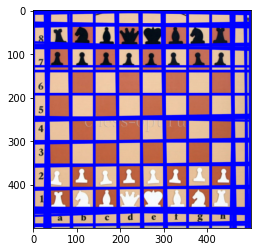

In [148]:
plt.imshow(image)

In [149]:
#ДЗ 
# 1. Для изображения sar_3.jpg найти наиболее протяженный участок
# (выделить линии при помощи преобразования Хафа)
# 2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.segmentation import clear_border

image = cv2.imread('sar_3.jpg')
if image is None:
    raise FileNotFoundError("Файл sar_3.jpg не найден. Убедитесь, что файл находится в правильной директории.")

if len(image.shape) == 3:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
else:
    gray = image.copy()

print("Изображение успешно загружено")

Изображение успешно загружено


ЗАДАНИЕ 1: Поиск наиболее протяженного участка
Самая длинная линия: длина = 113.18 пикселей
Координаты: (122, 122) -> (222, 69)


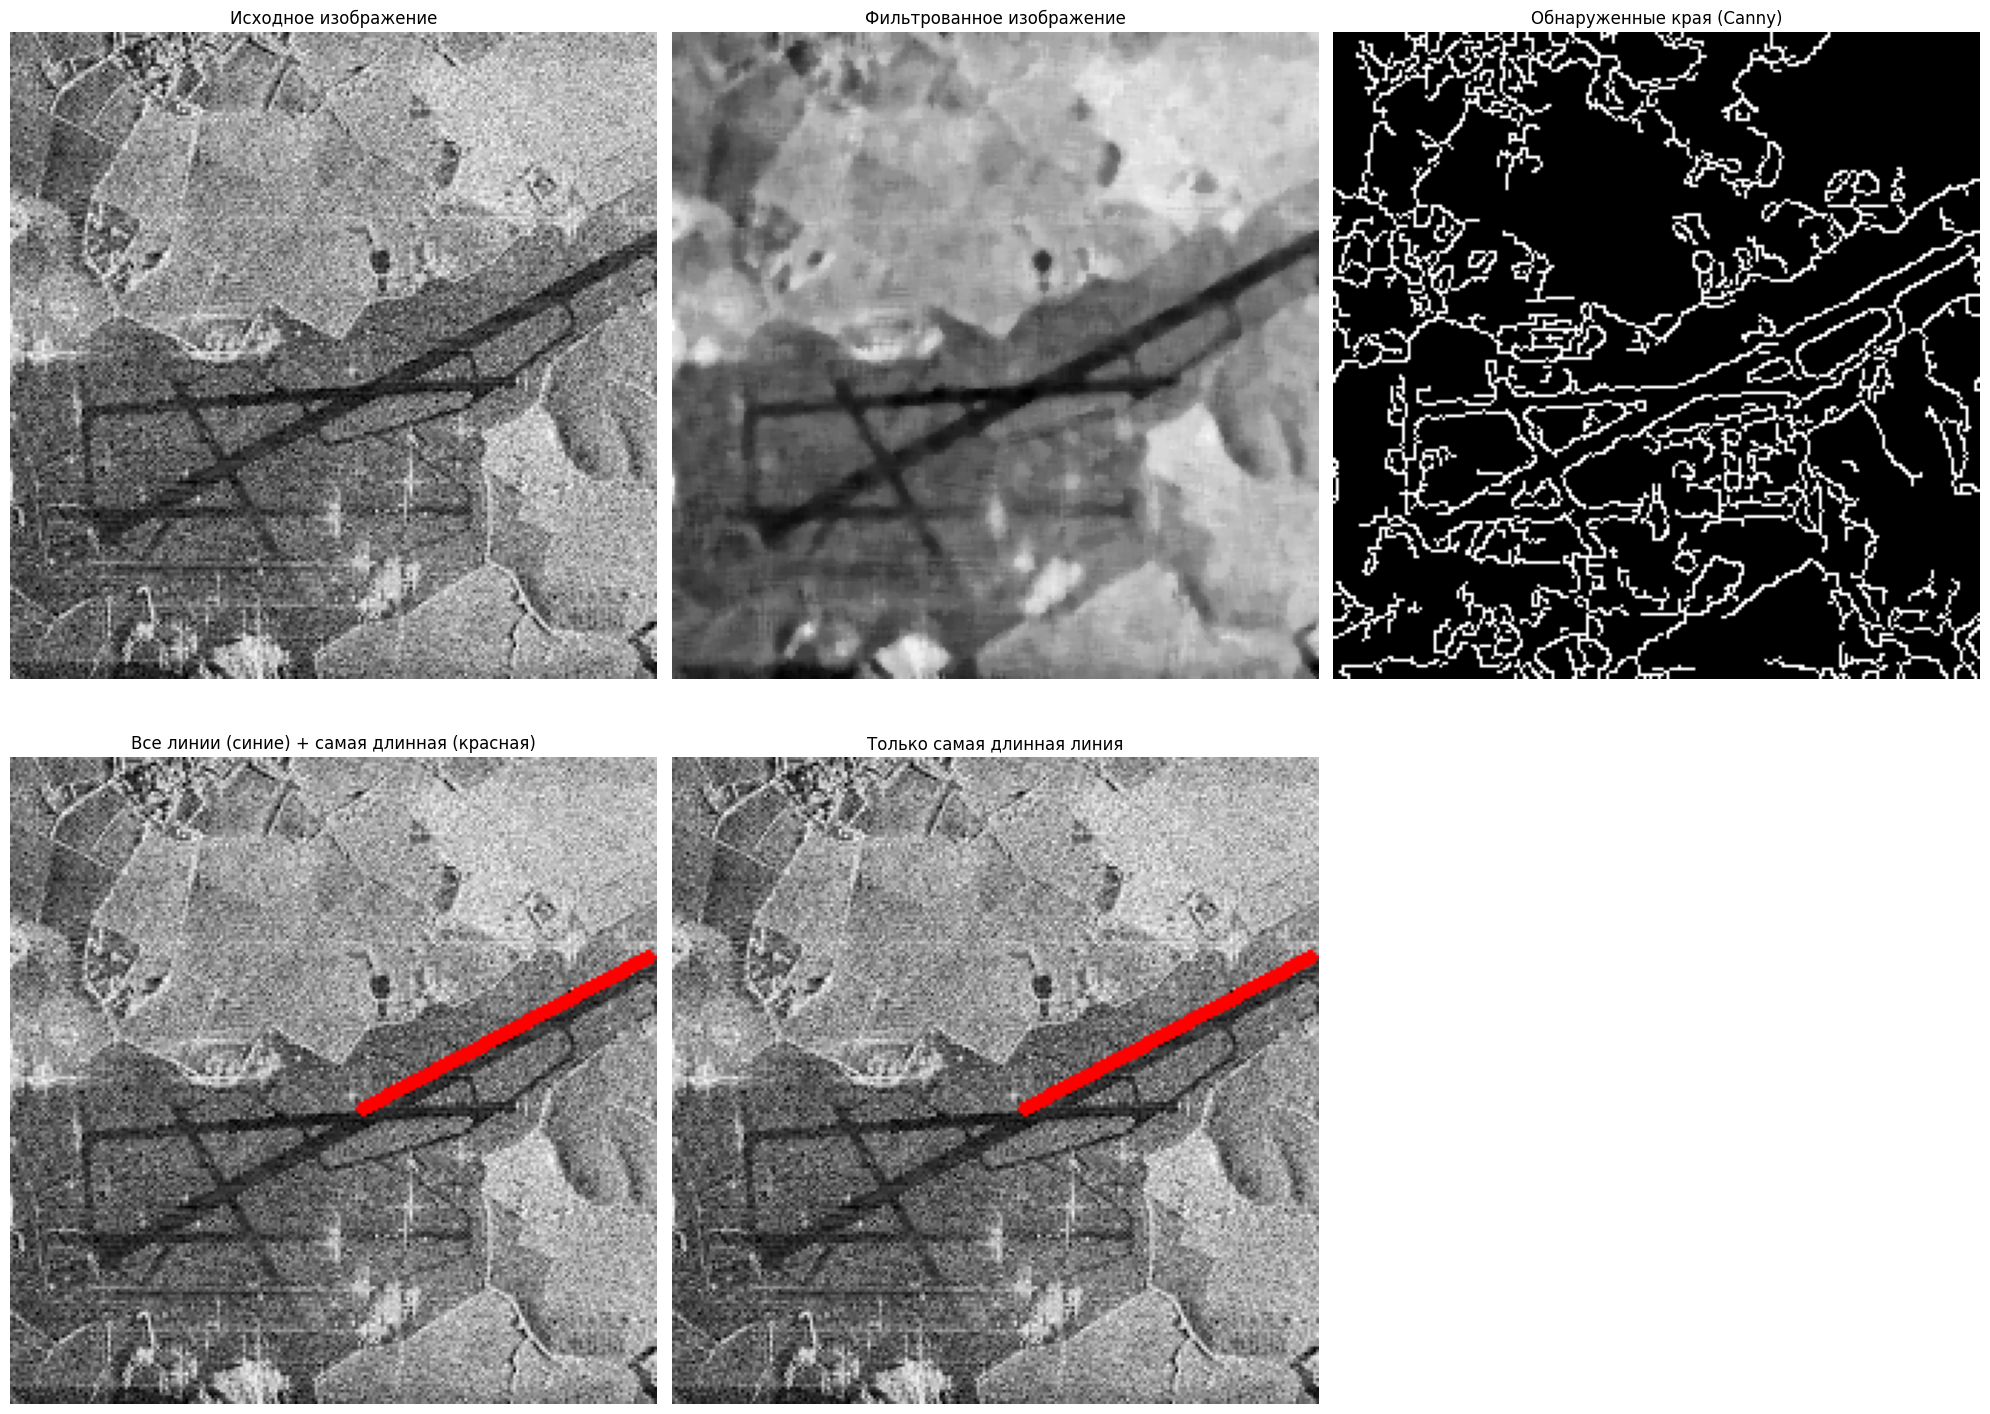

In [6]:
def hough_transform_demo(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gray_filtered = cv2.medianBlur(gray, 5)
    
    edges = cv2.Canny(gray_filtered, 50, 150, apertureSize=3)
    
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=100, 
                           minLineLength=100, maxLineGap=10)
    
    img_with_lines = img.copy()
    
    longest_line = None
    max_length = 0
    
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            length = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
            
            if length > max_length:
                max_length = length
                longest_line = line[0]
            
            cv2.line(img_with_lines, (x1, y1), (x2, y2), (255, 0, 0), 2)
    
    if longest_line is not None:
        x1, y1, x2, y2 = longest_line
        cv2.line(img_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 4)
        print(f"Самая длинная линия: длина = {max_length:.2f} пикселей")
        print(f"Координаты: ({x1}, {y1}) -> ({x2}, {y2})")
    
    plt.figure(figsize=(20, 15))
    
    plt.subplot(2, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(2, 3, 2)
    plt.imshow(gray_filtered, cmap='gray')
    plt.title('Фильтрованное изображение')
    plt.axis('off')
    
    plt.subplot(2, 3, 3)
    plt.imshow(edges, cmap='gray')
    plt.title('Обнаруженные края (Canny)')
    plt.axis('off')
    
    plt.subplot(2, 3, 4)
    plt.imshow(cv2.cvtColor(img_with_lines, cv2.COLOR_BGR2RGB))
    plt.title('Все линии (синие) + самая длинная (красная)')
    plt.axis('off')
    
    img_longest_only = img.copy()
    if longest_line is not None:
        x1, y1, x2, y2 = longest_line
        cv2.line(img_longest_only, (x1, y1), (x2, y2), (0, 0, 255), 4)
    
    plt.subplot(2, 3, 5)
    plt.imshow(cv2.cvtColor(img_longest_only, cv2.COLOR_BGR2RGB))
    plt.title('Только самая длинная линия')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    return longest_line, max_length

print("=" * 60)
print("ЗАДАНИЕ 1: Поиск наиболее протяженного участка")
print("=" * 60)
longest_line, max_length = hough_transform_demo('sar_3.jpg')


ЗАДАНИЕ 2: Исследование алгоритмов бинаризации


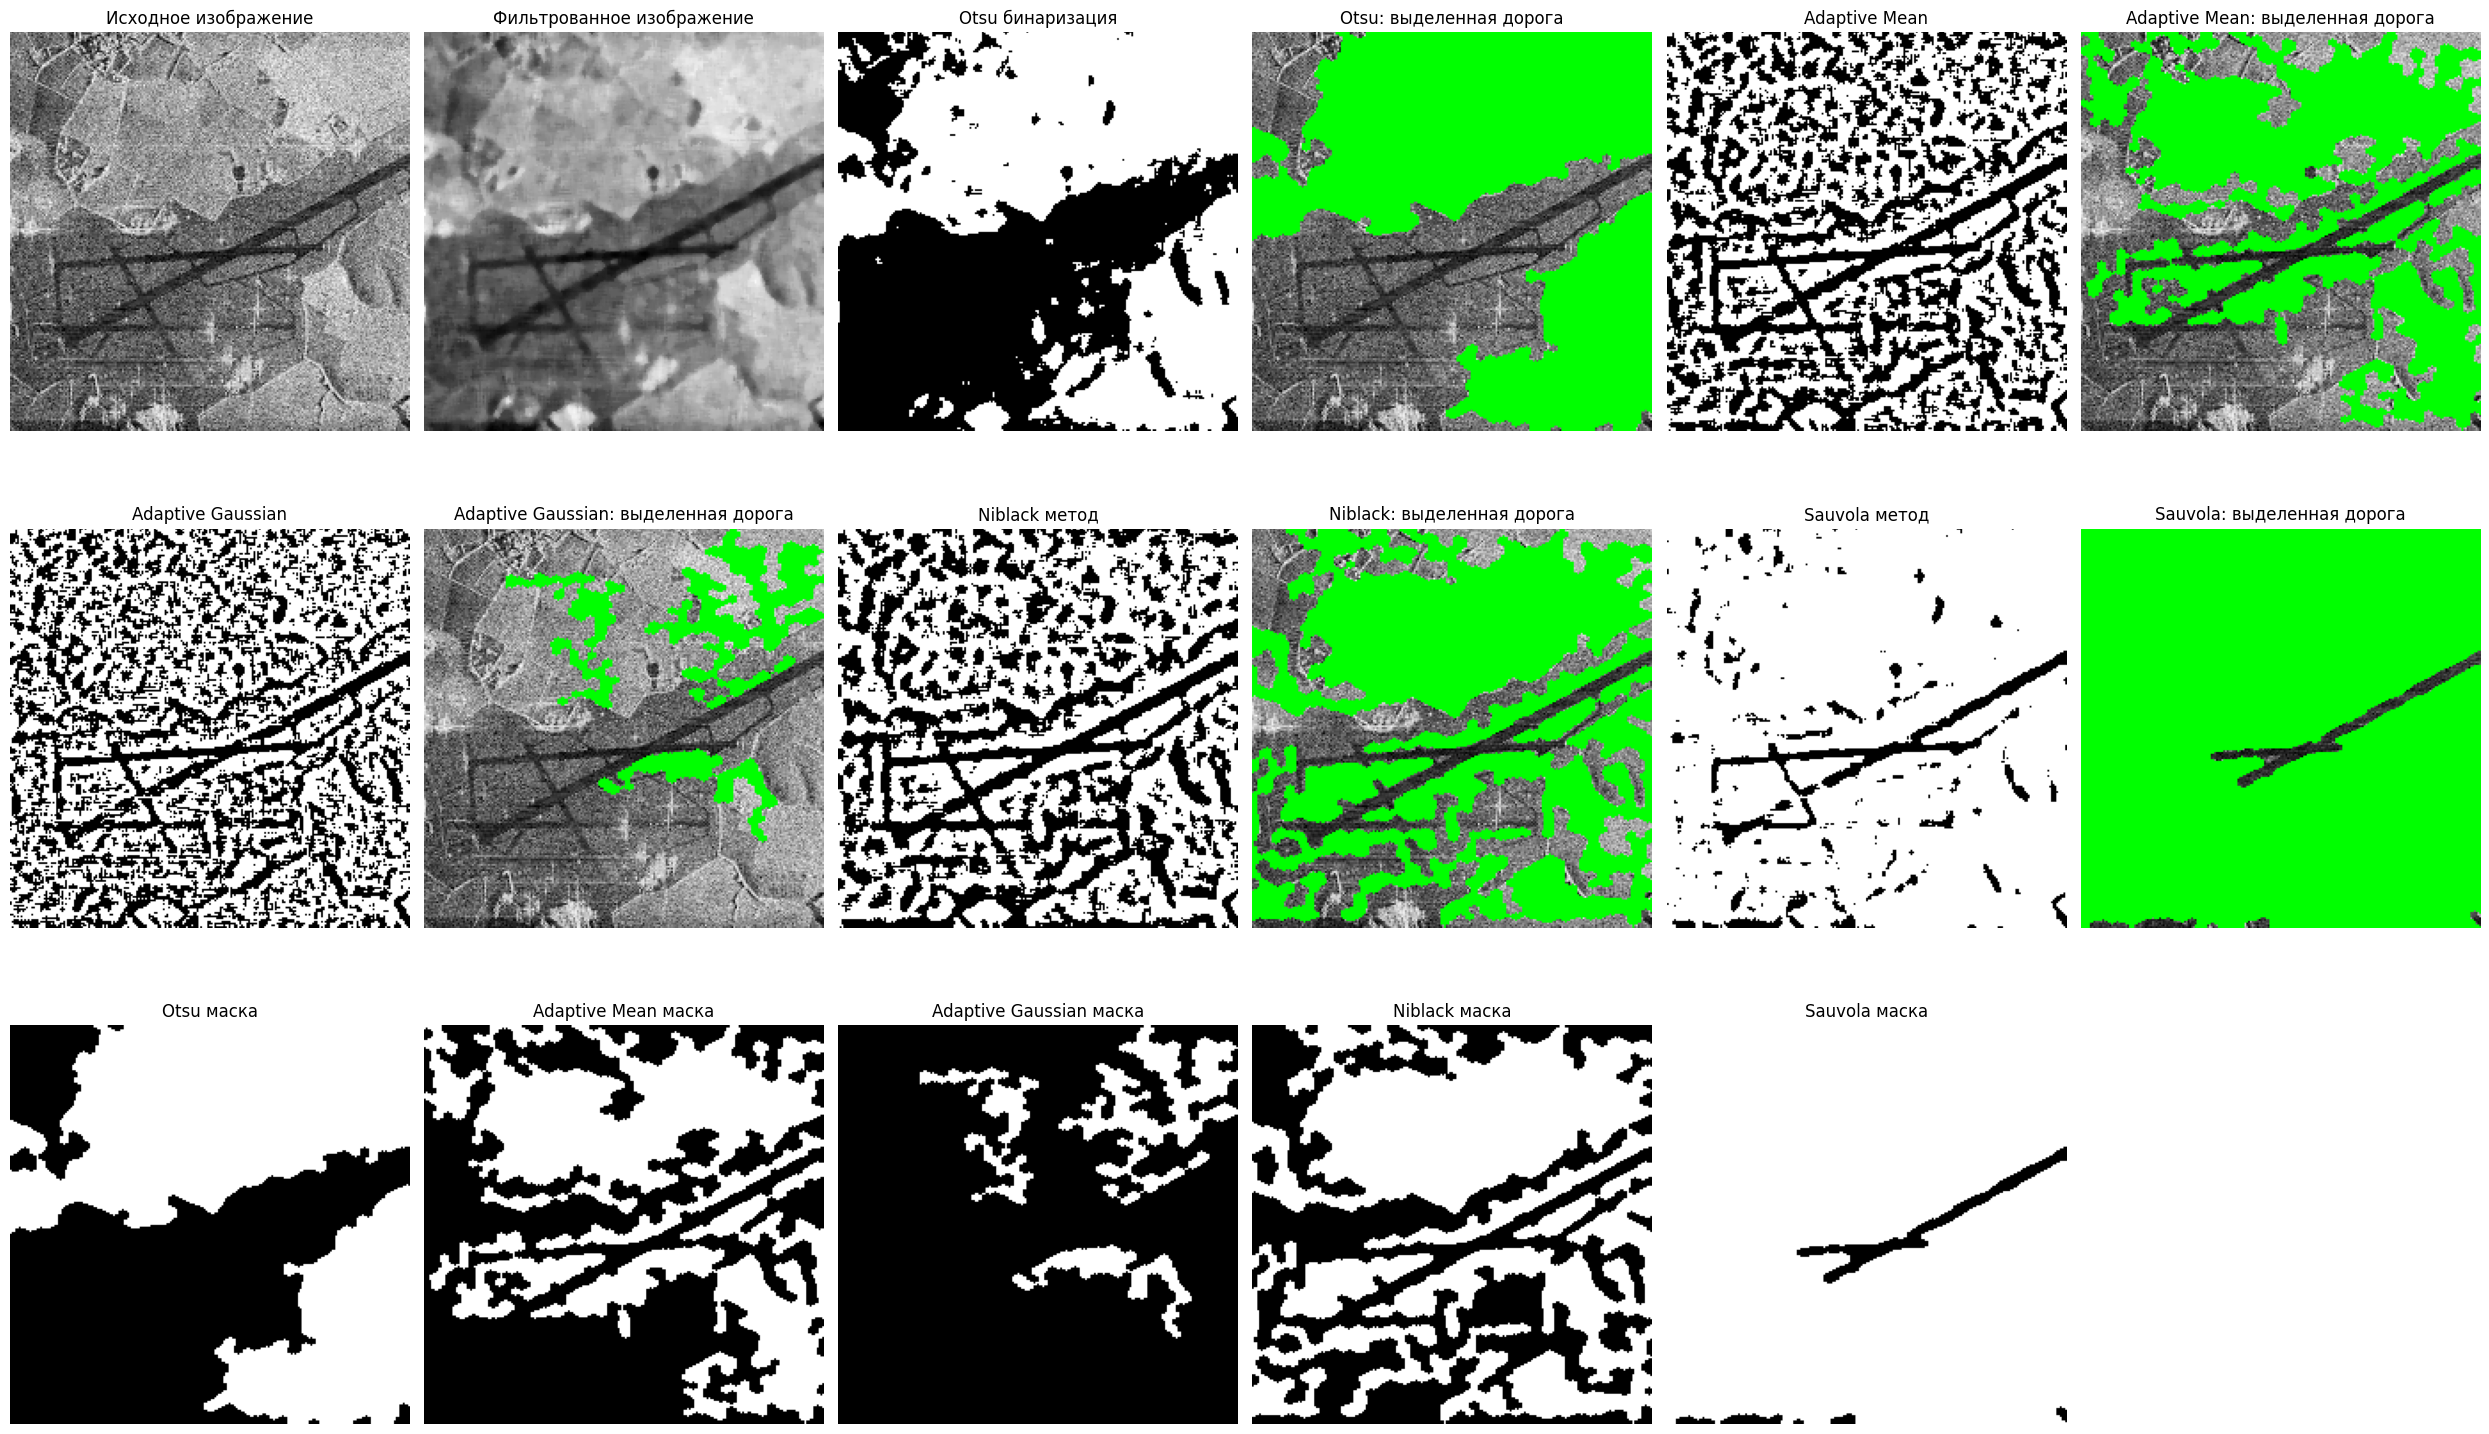


АНАЛИЗ РЕЗУЛЬТАТОВ БИНАРИЗАЦИИ:
Otsu: 27077 пикселей дороги (53.49% изображения)
Adaptive Mean: 22699 пикселей дороги (44.84% изображения)
Adaptive Gaussian: 6042 пикселей дороги (11.93% изображения)
Niblack: 28907 пикселей дороги (57.10% изображения)
Sauvola: 49100 пикселей дороги (96.99% изображения)


In [5]:
def binarization_study(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    gray_filtered = cv2.medianBlur(gray, 5)
    
    _, otsu_thresh = cv2.threshold(gray_filtered, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    adaptive_mean = cv2.adaptiveThreshold(gray_filtered, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                         cv2.THRESH_BINARY, 11, 2)
    
    adaptive_gaussian = cv2.adaptiveThreshold(gray_filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY, 11, 2)
    
    def niblack_threshold(image, window_size=15, k=-0.2):
        mean = cv2.blur(image, (window_size, window_size))
        mean_sq = cv2.blur(image**2, (window_size, window_size))
        std_dev = np.sqrt(mean_sq - mean**2)
        threshold = mean + k * std_dev
        return (image > threshold).astype(np.uint8) * 255
    
    niblack_result = niblack_threshold(gray_filtered)
    
    def sauvola_threshold(image, window_size=15, k=0.2, R=128):
        mean = cv2.blur(image, (window_size, window_size))
        mean_sq = cv2.blur(image**2, (window_size, window_size))
        std_dev = np.sqrt(mean_sq - mean**2)
        threshold = mean * (1 + k * (std_dev / R - 1))
        return (image > threshold).astype(np.uint8) * 255
    
    sauvola_result = sauvola_threshold(gray_filtered)
    
    def postprocess_road(binary_image, original_img):
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
        cleaned = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
        cleaned = cv2.morphologyEx(cleaned, cv2.MORPH_CLOSE, kernel)
        
        contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        
        mask = np.zeros_like(cleaned)
        for contour in contours:
            area = cv2.contourArea(contour)
            if area > 1000:
                cv2.drawContours(mask, [contour], -1, 255, -1)
        
        result_img = original_img.copy()
        result_img[mask == 255] = [0, 255, 0]
        
        return result_img, mask
    
    otsu_road, otsu_mask = postprocess_road(otsu_thresh, img)
    adaptive_mean_road, adaptive_mean_mask = postprocess_road(adaptive_mean, img)
    adaptive_gaussian_road, adaptive_gaussian_mask = postprocess_road(adaptive_gaussian, img)
    niblack_road, niblack_mask = postprocess_road(niblack_result, img)
    sauvola_road, sauvola_mask = postprocess_road(sauvola_result, img)
    
    plt.figure(figsize=(25, 20))
    
    plt.subplot(4, 6, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(4, 6, 2)
    plt.imshow(gray_filtered, cmap='gray')
    plt.title('Фильтрованное изображение')
    plt.axis('off')
    
    plt.subplot(4, 6, 3)
    plt.imshow(otsu_thresh, cmap='gray')
    plt.title('Otsu бинаризация')
    plt.axis('off')
    
    plt.subplot(4, 6, 4)
    plt.imshow(cv2.cvtColor(otsu_road, cv2.COLOR_BGR2RGB))
    plt.title('Otsu: выделенная дорога')
    plt.axis('off')
    
    plt.subplot(4, 6, 5)
    plt.imshow(adaptive_mean, cmap='gray')
    plt.title('Adaptive Mean')
    plt.axis('off')
    
    plt.subplot(4, 6, 6)
    plt.imshow(cv2.cvtColor(adaptive_mean_road, cv2.COLOR_BGR2RGB))
    plt.title('Adaptive Mean: выделенная дорога')
    plt.axis('off')
    
    plt.subplot(4, 6, 7)
    plt.imshow(adaptive_gaussian, cmap='gray')
    plt.title('Adaptive Gaussian')
    plt.axis('off')
    
    plt.subplot(4, 6, 8)
    plt.imshow(cv2.cvtColor(adaptive_gaussian_road, cv2.COLOR_BGR2RGB))
    plt.title('Adaptive Gaussian: выделенная дорога')
    plt.axis('off')
    
    plt.subplot(4, 6, 9)
    plt.imshow(niblack_result, cmap='gray')
    plt.title('Niblack метод')
    plt.axis('off')
    
    plt.subplot(4, 6, 10)
    plt.imshow(cv2.cvtColor(niblack_road, cv2.COLOR_BGR2RGB))
    plt.title('Niblack: выделенная дорога')
    plt.axis('off')
    
    plt.subplot(4, 6, 11)
    plt.imshow(sauvola_result, cmap='gray')
    plt.title('Sauvola метод')
    plt.axis('off')
    
    plt.subplot(4, 6, 12)
    plt.imshow(cv2.cvtColor(sauvola_road, cv2.COLOR_BGR2RGB))
    plt.title('Sauvola: выделенная дорога')
    plt.axis('off')
    
    plt.subplot(4, 6, 13)
    plt.imshow(otsu_mask, cmap='gray')
    plt.title('Otsu маска')
    plt.axis('off')
    
    plt.subplot(4, 6, 14)
    plt.imshow(adaptive_mean_mask, cmap='gray')
    plt.title('Adaptive Mean маска')
    plt.axis('off')
    
    plt.subplot(4, 6, 15)
    plt.imshow(adaptive_gaussian_mask, cmap='gray')
    plt.title('Adaptive Gaussian маска')
    plt.axis('off')
    
    plt.subplot(4, 6, 16)
    plt.imshow(niblack_mask, cmap='gray')
    plt.title('Niblack маска')
    plt.axis('off')
    
    plt.subplot(4, 6, 17)
    plt.imshow(sauvola_mask, cmap='gray')
    plt.title('Sauvola маска')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\nАНАЛИЗ РЕЗУЛЬТАТОВ БИНАРИЗАЦИИ:")
    print("=" * 50)
    masks = {
        'Otsu': otsu_mask,
        'Adaptive Mean': adaptive_mean_mask,
        'Adaptive Gaussian': adaptive_gaussian_mask,
        'Niblack': niblack_mask,
        'Sauvola': sauvola_mask
    }
    
    for name, mask in masks.items():
        road_pixels = np.sum(mask == 255)
        total_pixels = mask.size
        road_percentage = (road_pixels / total_pixels) * 100
        print(f"{name}: {road_pixels} пикселей дороги ({road_percentage:.2f}% изображения)")
    
    return masks

print("\n" + "=" * 60)
print("ЗАДАНИЕ 2: Исследование алгоритмов бинаризации")
print("=" * 60)
binary_masks = binarization_study('sar_3.jpg')